In [37]:
# Import all the necessary libraries for Data Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [38]:
# Load the data and assign columns

results = pd.read_csv('C:/Users/hasan/Documents/Python Scripts/Formula One Dataset/results.csv', names = ['result_id', 'race_id', 'driver_id', 'constructor_id', 'number', 'grid', 'position', 'position_text', 'position_order', 'points', 'laps', 'time', 'milliseconds', 'fastest_lap', 'rank', 'fastest_lap_time', 'fastest_lap_speed', 'status_id'], header = None)
races = pd.read_csv('C:/Users/hasan/Documents/Python Scripts/Formula One Dataset/races.csv', names = ['race_id', 'year', 'round', 'circuit_id', 'name', 'date', 'time', 'url'], header = None)
drivers = pd.read_csv('C:/Users/hasan/Documents/Python Scripts/Formula One Dataset/drivers.csv', names = ['driver_id', 'driver_ref', 'number', 'code', 'firstname', 'surname', 'dob', 'nationality', 'url'], header = None)
constructors = pd.read_csv('C:/Users/hasan/Documents/Python Scripts/Formula One Dataset/constructors.csv', names = ['constructor_id', 'constructor_ref', 'name', 'nationality', 'url'], header = None)

In [39]:
# Merge Datasets

df = pd.merge(results, races[['race_id', 'year', 'name', 'round']], on = 'race_id', how = 'left')
df = pd.merge(df, drivers[['driver_id', 'driver_ref', 'nationality']], on = 'driver_id', how = 'left')
df = pd.merge(df, constructors[['constructor_id', 'name', 'nationality']], on = 'constructor_id', how = 'left')

In [40]:
# Drop Columns

df.drop(['number', 'position', 'position_text', 'laps', 'fastest_lap', 'status_id', 'result_id', 'race_id', 'driver_id', 'constructor_id'], axis = 1, inplace = True)

In [41]:
# Rename columns

df.rename(columns = {'rank' : 'fastest_lap_rank', 'name_x' : 'gp_name', 'nationality_x' : 'driver_nationality', 'name_y' : 'constructor_name', 'nationality_y' : 'constructor_nationality', 'driver_ref' : 'driver'}, inplace = True)

In [42]:
# Rearrange columns

df = df[['year', 'gp_name', 'round', 'driver', 'constructor_name', 'grid', 'position_order', 'points', 'time', 'milliseconds', 
         'fastest_lap_rank', 'fastest_lap_time', 'fastest_lap_speed', 'driver_nationality', 'constructor_nationality']]

In [43]:
# Drop Season 2022

df = df[df['year'] != 2022]

In [44]:
# Sort Values

df = df.sort_values(by = ['year', 'round', 'position_order'], ascending = [False, True, True])

In [45]:
# Replace \N values in time columns

df.time.replace('\\N', np.nan, inplace = True)
df.milliseconds.replace('\\N', np.nan, inplace = True)
df.fastest_lap_rank.replace('\\N', np.nan, inplace = True)
df.fastest_lap_time.replace('\\N', np.nan, inplace = True)
df.fastest_lap_speed.replace('\\N', np.nan, inplace = True)

In [49]:
# Change Datatypes

df.fastest_lap_speed = df.fastest_lap_speed.astype(float)
df.fastest_lap_rank = df.fastest_lap_rank.astype(float)
df.milliseconds = df.milliseconds.astype(float)


In [50]:
# Reset Index

df.reset_index(drop = True, inplace = True)

In [51]:
# Shape of Dataset

print(df.shape)

(25400, 15)


In [52]:
# Info of Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25400 entries, 0 to 25399
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     25400 non-null  int64  
 1   gp_name                  25400 non-null  object 
 2   round                    25400 non-null  int64  
 3   driver                   25400 non-null  object 
 4   constructor_name         25400 non-null  object 
 5   grid                     25400 non-null  int64  
 6   position_order           25400 non-null  int64  
 7   points                   25400 non-null  float64
 8   time                     6809 non-null   object 
 9   milliseconds             6808 non-null   float64
 10  fastest_lap_rank         7151 non-null   float64
 11  fastest_lap_time         6953 non-null   object 
 12  fastest_lap_speed        6953 non-null   float64
 13  driver_nationality       25400 non-null  object 
 14  constructor_nationalit

In [53]:
# Head of the Dataset

df.head(10)

,year,gp_name,round,driver,constructor_name,grid,position_order,points,time,milliseconds,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,driver_nationality,constructor_nationality
0,2021,Bahrain Grand Prix,1,hamilton,Mercedes,2,1,25.0,32:03.9,5523897.0,4.0,01:34.0,207.235,British,German
1,2021,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,2,18.0,0.745,5524642.0,2.0,01:33.2,208.984,Dutch,Austrian
2,2021,Bahrain Grand Prix,1,bottas,Mercedes,3,3,16.0,37.383,5561280.0,1.0,01:32.1,211.566,Finnish,German
3,2021,Bahrain Grand Prix,1,norris,McLaren,7,4,12.0,46.466,5570363.0,6.0,01:34.4,206.398,British,British
4,2021,Bahrain Grand Prix,1,perez,Red Bull,0,5,10.0,52.047,5575944.0,3.0,01:34.0,207.334,Mexican,Austrian
5,2021,Bahrain Grand Prix,1,leclerc,Ferrari,4,6,8.0,59.09,5582987.0,11.0,01:35.0,205.112,Monegasque,Italian
6,2021,Bahrain Grand Prix,1,ricciardo,McLaren,6,7,6.0,66.004,5589901.0,10.0,01:34.9,205.233,Australian,British
7,2021,Bahrain Grand Prix,1,sainz,Ferrari,8,8,4.0,67.1,5590997.0,7.0,01:34.5,206.151,Spanish,Italian
8,2021,Bahrain Grand Prix,1,tsunoda,AlphaTauri,13,9,2.0,85.692,5609589.0,8.0,01:34.8,205.603,Japanese,Italian
9,2021,Bahrain Grand Prix,1,stroll,Aston Martin,10,10,1.0,86.713,5610610.0,9.0,01:34.9,205.378,Canadian,British


In [55]:
# Set the figure size 

sns.set_palette('Set3')
plt.rcParams['figure.figsize'] = 10,6

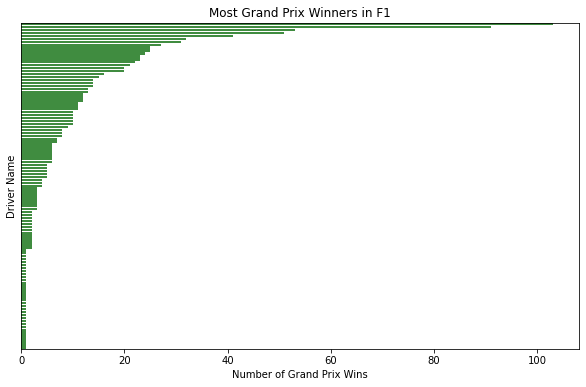

In [62]:
# Grand Prix Winners

driver_winner = df.loc[df['position_order'] == 1].groupby('driver')['position_order'].count().sort_values(ascending = False).to_frame().reset_index()

# Bar plot

sns.barplot(data = driver_winner, y = 'driver', x = 'position_order', color = 'green', alpha = 0.8)
plt.title('Most Grand Prix Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of Grand Prix Wins')
plt.yticks([]);

In [57]:
# Find the top 10 GP winners

top_10_drivers = driver_winner.head(10)

print(top_10_drivers)

               driver  position_order
0            hamilton             103
1  michael_schumacher              91
2              vettel              53
3               prost              51
4               senna              41
5              alonso              32
6             mansell              31
7             stewart              27
8               clark              25
9               lauda              25


Text(0.5, 0, 'Number of GP wins')

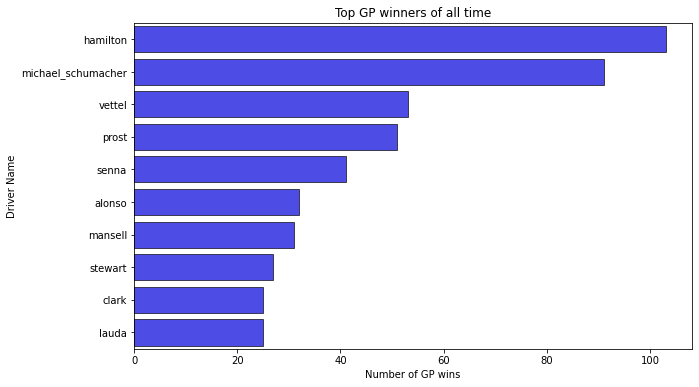

In [58]:
# Top 10 drivers plot

sns.barplot(data = top_10_drivers, y = 'driver', x = 'position_order', color = 'blue', alpha = 0.8, lw = 0.8, edgecolor = 'black')
plt.title('Top GP winners of all time')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')

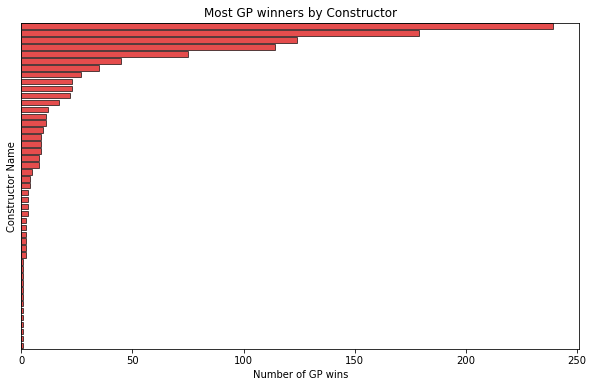

In [61]:
# GP Constructors Winners

constructor_winner = df.loc[df['position_order'] == 1].groupby('constructor_name')['position_order'].count().sort_values(ascending = False).to_frame().reset_index()

# Create a bar plot for most constructor wins
sns.barplot(data = constructor_winner, y = 'constructor_name', x = 'position_order', color = 'red', alpha = 0.8, lw = 0.8, edgecolor = 'black')
plt.title('Most GP winners by Constructor')
plt.ylabel('Constructor Name')
plt.xlabel('Number of GP wins')
plt.yticks([]);

In [63]:
# Top 10 GP Constructors winners

top_10_constructors = constructor_winner.head(10)

print(top_10_constructors)

  constructor_name  position_order
0          Ferrari             239
1          McLaren             179
2         Mercedes             124
3         Williams             114
4         Red Bull              75
5       Team Lotus              45
6          Renault              35
7         Benetton              27
8          Brabham              23
9          Tyrrell              23


Text(0.5, 0, 'Number of GP wins')

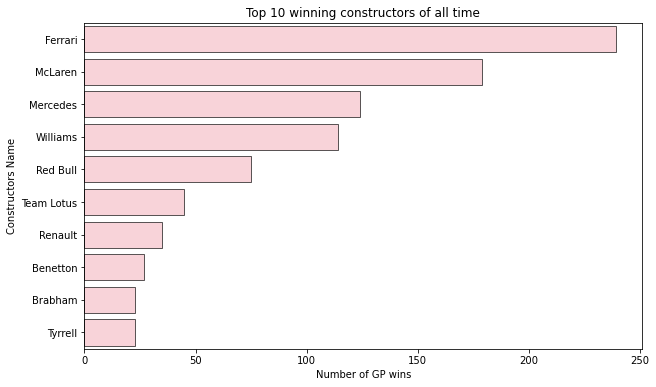

In [65]:
# Bar plot for top 10 winning constructors

sns.barplot(data = top_10_constructors, y = 'constructor_name', x = 'position_order', color = 'pink', alpha = 0.8, lw = 0.8, edgecolor = 'black')
plt.title('Top 10 winning constructors of all time')
plt.ylabel('Constructors Name')
plt.xlabel('Number of GP wins')

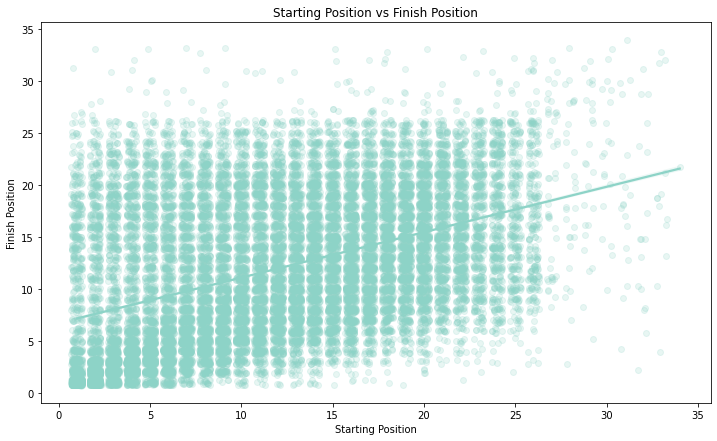

In [68]:
df_no_zero = df[df['grid'] != 0]

# Create a regression plot to show the relationship between finishing grid position with starting grid position
plt.figure(figsize = (12,7))
sns.regplot(data = df_no_zero, x = 'grid', y = 'position_order', x_jitter = 0.3, y_jitter = 0.3, scatter_kws = {'alpha' : 1/5});
plt.title('Starting Position vs Finish Position')
plt.ylabel('Finish Position')
plt.xlabel('Starting Position');

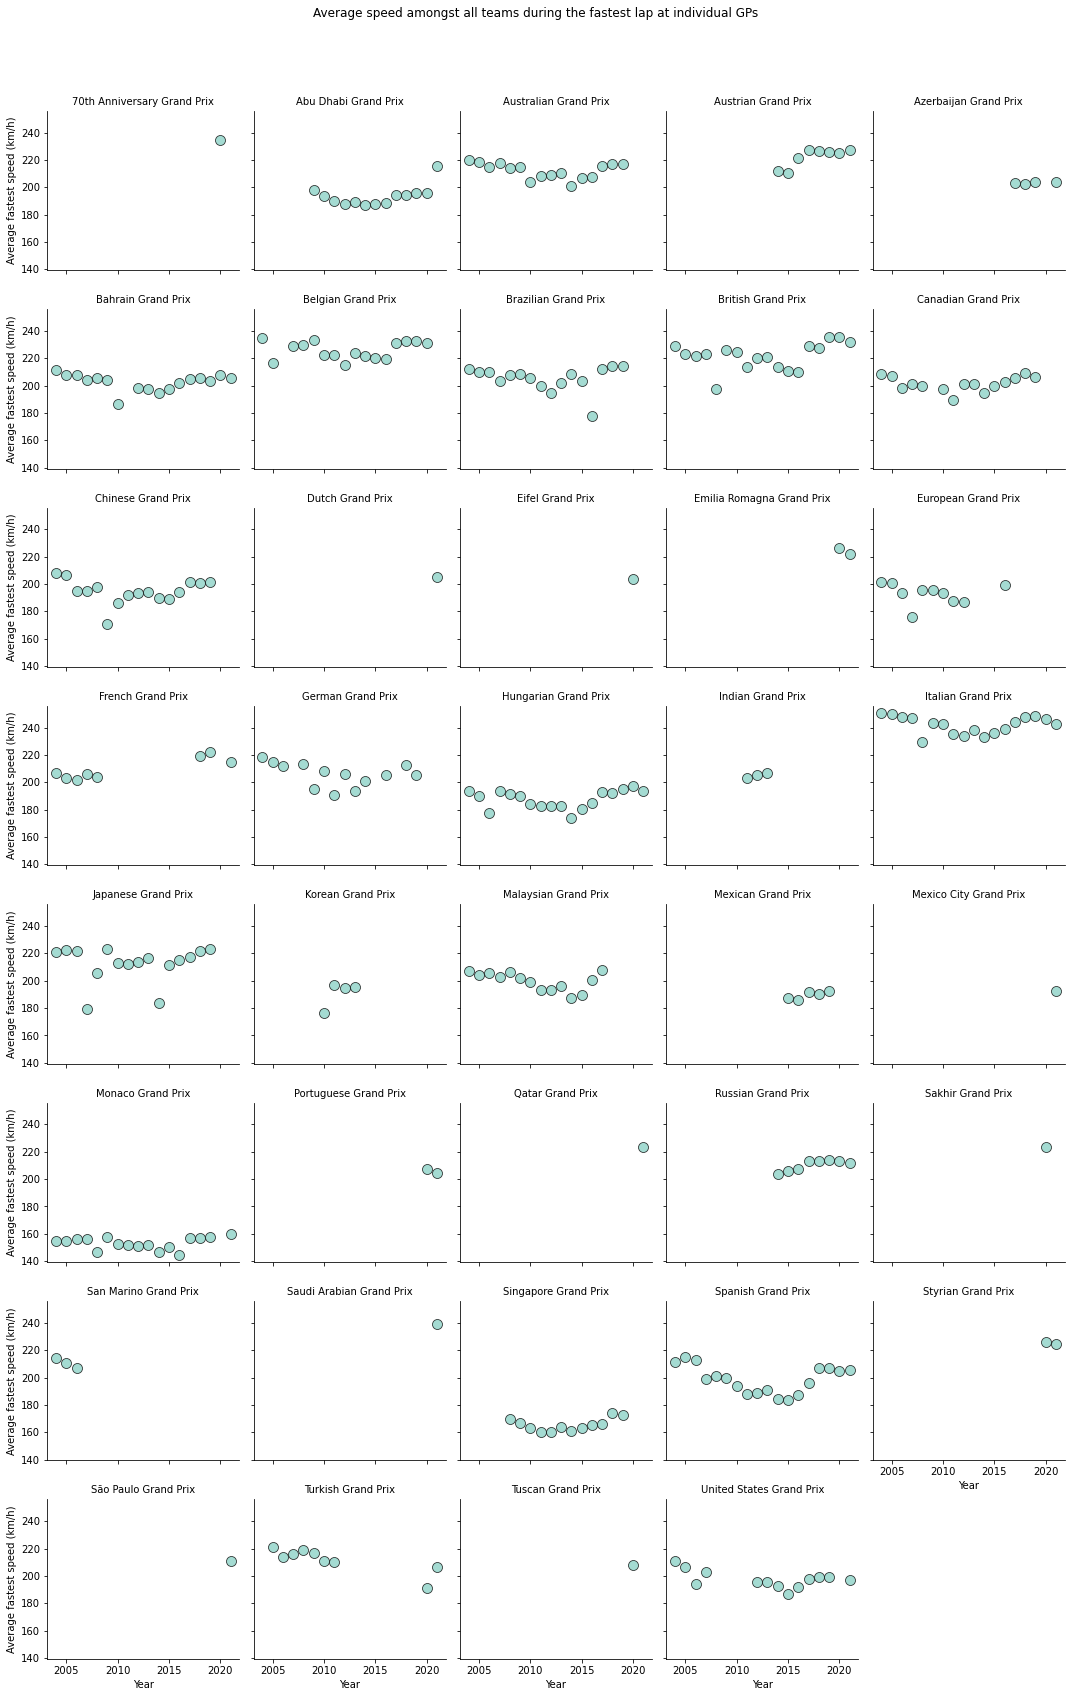

In [70]:
# Create a new data frame for seasons 2004 onwards
df_speed = df[df['year'] >= 2004].groupby(['gp_name', 'year'])['fastest_lap_speed'].mean().to_frame().reset_index()

# Create a facetgrid
g = sns.FacetGrid(data = df_speed, col = 'gp_name', col_wrap = 5)
g.map(plt.scatter, 'year', 'fastest_lap_speed', alpha = 0.8, lw = 0.8, edgecolor = 'black', s = 100)
g.set_titles('{col_name}')
g.set_xlabels('Year')
g.set_ylabels('Average fastest speed (km/h)')
plt.subplots_adjust(top = 0.92)
g.fig.suptitle('Average speed amongst all teams during the fastest lap at individual GPs');
